# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [4]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./data/movies.csv")
df.head(10)
df.info

<bound method DataFrame.info of                                    MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, C

**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [7]:
# gives shape of the table: there are 9999 rows and 10 columns
df.shape

(9999, 9)

In [8]:
# df.isnull().sum() gives you the sum of each category, sum in sum gives the sum of all missing values
df.isnull().sum().sum()

16861

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [10]:
df.YEAR = df.YEAR.fillna("Unknown")
df.GENRE = df.GENRE.fillna("Unknown")
df.RATING = df.RATING.fillna(df.RATING.median())
df.VOTES = df.VOTES.fillna(0)

In [11]:
df.info

<bound method DataFrame.info of                                    MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, C

**1.4 Drop the duplicated rows**

In [13]:
df.drop_duplicates(inplace=True)

**1.5 Replace the columns names to make them all lowercase**

In [15]:
df.columns = [x.lower() for x in df.columns]

In [16]:
df.head(1)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [18]:
df.votes = df.votes.str.replace(",", "")

In [19]:
df.votes = df.votes.astype(float)
df.votes.dtypes

dtype('float64')

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [22]:
#the mean rating for listed movies is 6.95
df.rating.mean()

6.94608068561873

**2.2 What is the maximum runtime?**

In [24]:
#max runtime is 853 minutes
df.runtime.max()

853.0

**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [26]:
df[df.runtime == df.runtime.max()]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...",3876.0,853.0,NaN


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

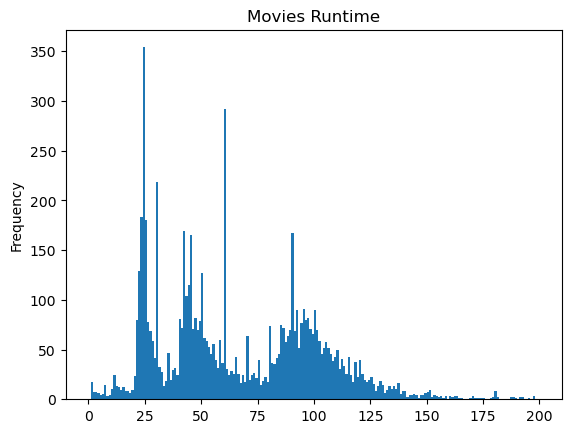

In [28]:
df.runtime.plot(kind='hist', title="Movies Runtime", range = (0,200), bins = 200);

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [30]:
#to be part of the top 10% of movies when it comes to votes, a movie will need  22,194 votes
df.votes.quantile(0.9)

22193.100000000035

## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [38]:
df_meta = pd.read_csv("./data/movies_metadata.csv", low_memory=False)

In [48]:
#change name of original_title header to "movies", as the "movies" column in the first dataset used original titles
df_meta = df_meta.rename(columns={"original_title": "movies"}) 
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   movies                 45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [46]:
inner_movies_df = df.merge(df_meta, how = "inner", on = "movies")
inner_movies_df.head(10)

,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,...,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,...,1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0
2,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222.0,42.0,NaN,False,...,2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0
3,The Good Doctor,(2017– ),\nDrama,8.1,"\nShaun Murphy, a young surgeon with autism an...","\n \n Stars:\nFreddie Highmore, ...",70871.0,41.0,NaN,False,...,2011-01-01,5206.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Do no harm.,The Good Doctor,False,5.0,52.0
4,Supernatural,(2005–2020),"\nDrama, Fantasy, Horror",8.4,\nTwo brothers follow their father's footsteps...,"\n \n Stars:\nJared Padalecki, \...",404273.0,44.0,NaN,False,...,1933-05-12,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Supernatural,False,4.3,4.0
5,Animal Kingdom,(2016– ),"\nCrime, Drama",8.2,"\nCenters on a Southern California family, who...","\n \n Stars:\nShawn Hatosy, \nBe...",26926.0,60.0,NaN,False,...,2010-06-03,1000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A crime story.,Animal Kingdom,False,6.7,240.0
6,Outlander,(2014– ),"\nDrama, Fantasy, Romance",8.4,\nAn English combat nurse from 1945 is mysteri...,"\n \n Stars:\nCaitriona Balfe, \...",134991.0,64.0,NaN,False,...,2008-04-24,7033683.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It destroyed his world. He won't let it destro...,Outlander,False,6.1,354.0
7,Fargo,(2014– ),"\nCrime, Drama, Thriller",8.9,"\nVarious chronicles of deception, intrigue an...",\n \n Stars:\nBilly Bob Thornton...,341221.0,53.0,NaN,False,...,1996-04-05,60611975.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can happen in the middle of nowhere.,Fargo,False,7.7,2080.0
8,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,$402.45M,False,...,1993-06-11,920100000.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An adventure 65 million years in the making.,Jurassic Park,False,7.6,4956.0
9,Daredevil,(2015–2018),"\nAction, Crime, Drama",8.6,"\nA blind lawyer by day, vigilante by night. M...","\n \n Stars:\nCharlie Cox, \nVin...",374963.0,54.0,NaN,False,...,2003-02-14,179179718.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Guardian Devil,Daredevil,False,5.0,1551.0
